## Topic Modeling

### Importing the necessary libraries

In [ ]:
pip install clean-text

In [16]:
import os, types
import numpy as np
import re
import csv
import json
import pandas as pd
from collections import Counter

In [17]:
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn
from cleantext import clean

### Load the data

In [18]:
def jsonToDF(name):
    """Read a list of sentences from the JSON file, store them in a dataframe"""
    
    with open(f"{name}.json") as fin:
        textList = json.load(fin)

    # create a name for each document, based on its category
    indexNames = [f"{name}" for i in range(len(textList))]

    # create the dataframe, it will have one column and one index
    df = pd.DataFrame(data=textList, index=indexNames)
    df.columns = ['document']
    return df

In [19]:
user1 = jsonToDF("user1")
user2 = jsonToDF("user2")
user3 = jsonToDF("user3")
user4 = jsonToDF("user4")
user5 = jsonToDF("user5")
user6 = jsonToDF("user6")
user7 = jsonToDF("user7")
user8 = jsonToDF("user8")
user9 = jsonToDF("user9")
user10 = jsonToDF("user10")

In [20]:
user1.shape

(47, 1)

In [21]:
user2.shape

(3912, 1)

In [22]:
user3.shape

(12005, 1)

In [23]:
user4.shape

(5194, 1)

In [24]:
user5.shape

(4521, 1)

In [25]:
user6.shape

(17538, 1)

In [26]:
user7.shape

(19, 1)

In [27]:
user8.shape

(5999, 1)

In [28]:
user9.shape

(8179, 1)

In [29]:
user10.shape

(308, 1)

Concatenate all of them in a single dataframe:

In [30]:
allDocs = pd.concat([user1, user2, user3, user4, user5, user6, user7, user8, user9, user10])
allDocs.shape

(57722, 1)

In [31]:
pd.set_option("display.max_colwidth",1000)
allDocs.head(20)

,document
user1,"A couple bags of balloons, some left over decorations from my other daughters birthday, a few borrowed items from friends and family, and an hour or so of work, and they had a night to remember!! But the real question is, do you remember your first sleepover?!? 🤍🎈 #birthday #sleepover #party"
user1,who would you bring on a trip to the Bahamas 🌺 #honeymoon #travelbucketlist #thebahamas #caribbean #vacationinspo
user1,Things to do in Cabo - Part 2! 🇲🇽 #cabo #cabosanlucas #traveltok #travelblogger
user1,All the details to our 4 day trip in Cabo. ✨ #fyp #whatwespent #cabo #cabosanlucas #travel
user1,Let’s detox my son’s locs with me after 3 months #fypシ
user1,5 Must-Do things in Costa Rica💫🌴🌺🦜 #travel #traveltiktok #adventure #costarica #costaricatravel #thingstodo #nature #travellife #buckelist #rainforest #monteverde #views #waterfall #hangingbridges #ziplining
user1,land of adventures 🫶 #costaricatravel #costaricacool #dominicalcostarica #santateresacostarica #lafortunawaterfall #lafortunacostarica #nauyacawaterfalls
user1,When you invute your white friends over for food @Chantelle Rose @Adro Shot It @laurenrosefarmer
user1,When your white friends invite you in for food @Chantelle Rose @Adro Shot It @laurenrosefarmer
user1,#piinkmango #blackfriday


In [32]:
def getHashtags(sentence):
    """Takes a sentence and returns hashtags if present"""
    if isinstance(sentence, str):
        hashtags = [tag.strip('#') for tag in sentence.split('#') if tag.strip('#')]
        return hashtags
    return []

In [33]:
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)

def strip_emoji(text):
    return RE_EMOJI.sub(r'', text)

In [34]:
toRemove = ['fyp', '#trending', 'trending', '#foryou', 'foryou', '#viral', 'viral', 'foryoupage', 'fy', 'fypage', 'tiktok', 'video', 'forypu', 'fup', 'everyonefyp', 'reaction', 'fypviral']

def remove_words(sentence):
    sent = strip_emoji(sentence)
    hashtags = getHashtags(sent)
    final = []
    for hash in hashtags:
        #print(type(hash))
        if hash.lower() not in toRemove and hash not in final:
            final.append(hash)
    return ' '.join(final)

allDocs['document'] = allDocs['document'].apply(remove_words)
pd.set_option("display.max_colwidth",1000)
allDocs.tail(20)

,document
user10,But at least they got to go to Universal Studios… comedy parody satire skit familyvlog familyvlogchannel pov funny waitforit comedian acting actor fyp
user10,How many bowls can you eat in 10 minutes? RAINAISCRAZY taiwan @餓犬Dicky
user10,day trip to bmore means visiting cute vintage shops and markets baltimore bmoreflea vintagemarket fleamarket christmasmarket
user10,Anyhow
user10,They've got the Suite Life. Macaulay Culkin brought Brenda Song to tears as she proudly watched him receive a star on the Hollywood Walk of Fame. walkoffame brendasong macaulayculkin
user10,He still loves me momsoftiktok viral cactustoy babyboy reaction babiesoftiktok
user10,not part of the green text bubble gang thanks to my Galaxy z fold 5 from @SamsungUS! so many fun different color palettes and customizations available with the One UI 5 personalization! withgalaxy SamsungPartner teamgalaxyu
user10,words cant express how proud i am ❤️ 2023 is such a big year for him zb1 zerobaseone sunghanbin kpop kpopfyp mma2023
user10,this might be the worst thing ive ever posted sorry omegaverse
user10,woongki was so adorable in this episode woongki hyeongjun cravity boysplanet kpop kpopedit


### Convert to document-term matrix

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
# Initialize the vectorizer
vectorizer = CountVectorizer(
    strip_accents='unicode',
    stop_words='english',
    lowercase=True,
    token_pattern=r'\b[a-zA-Z]{3,}\b', # we want only words that contain letters and are 3 or more characters long
)

# Transform our data into the document-term matrix
dtm = vectorizer.fit_transform(allDocs['document'])
dtm

<57722x100021 sparse matrix of type '<class 'numpy.int64'>'
	with 555618 stored elements in Compressed Sparse Row format>

In [37]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['aaa', 'aaaa', 'aaaaaaaaaaa', ..., 'zyzcba', 'zyzz', 'zzuzzhas'],
      dtype=object)

In [38]:
def matrix2Doc(dtMatrix, features, index):
    """Turns each row of the document-term matrix into a list of terms"""
    row = dtMatrix.getrow(index).toarray()
    non_zero_indices = row.nonzero()[1]
    words = [features[idx] for idx in non_zero_indices]
    return words

In [39]:
allDocsAsTerms = [matrix2Doc(dtm, feature_names, i) for i in range(dtm.shape[0])]

In [40]:
allDocs['terms'] = allDocsAsTerms
pd.set_option("display.max_colwidth",1000)
allDocs.head()

,document,terms
user1,"A couple bags of balloons, some left over decorations from my other daughters birthday, a few borrowed items from friends and family, and an hour or so of work, and they had a night to remember!! But the real question is, do you remember your first sleepover?!? birthday sleepover party","[bags, balloons, birthday, borrowed, couple, daughters, decorations, family, friends, hour, items, left, night, party, question, real, remember, sleepover, work]"
user1,who would you bring on a trip to the Bahamas honeymoon travelbucketlist thebahamas caribbean vacationinspo,"[bahamas, bring, caribbean, honeymoon, thebahamas, travelbucketlist, trip, vacationinspo]"
user1,Things to do in Cabo - Part 2! cabo cabosanlucas traveltok travelblogger,"[cabo, cabosanlucas, things, travelblogger, traveltok]"
user1,All the details to our 4 day trip in Cabo. ✨ fyp whatwespent cabo cabosanlucas travel,"[cabo, cabosanlucas, day, details, fyp, travel, trip, whatwespent]"
user1,Let’s detox my son’s locs with me after 3 months fypシ,"[detox, let, locs, months, son]"


NameError: name 'LatentDirichletAllocation' is not defined

NameError: name 'grid' is not defined

### Fitting the LDA model

In [43]:
from sklearn.decomposition import LatentDirichletAllocation

In [44]:
from sklearn.model_selection import GridSearchCV

# We are going to test multiple values for the number of topics
search_params = {'n_components': [5, 10, 15, 20, 25, 30, 35]}

# Initialize the LDA model
lda = LatentDirichletAllocation()

# Initialize a Grid Search with cross-validation instance
grid = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
grid.fit(dtm)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'n_components': [5, 10, 15, 20, 25, 30, 35]})

In [45]:
grid.cv_results_

{'mean_fit_time': array([23.25813785, 20.68741579, 20.30759678, 20.35532131, 20.11225119,
        20.13810964, 20.36762991]),
 'std_fit_time': array([0.49920425, 0.17105345, 0.23474917, 0.13783739, 0.48286907,
        0.23537515, 0.29654376]),
 'mean_score_time': array([0.69198675, 0.65732141, 0.6306654 , 0.62400441, 0.58266082,
        0.55811019, 0.56300058]),
 'std_score_time': array([0.03273665, 0.07399221, 0.03309222, 0.00549484, 0.00782664,
        0.00859739, 0.0103657 ]),
 'param_n_components': masked_array(data=[5, 10, 15, 20, 25, 30, 35],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_components': 5},
  {'n_components': 10},
  {'n_components': 15},
  {'n_components': 20},
  {'n_components': 25},
  {'n_components': 30},
  {'n_components': 35}],
 'split0_test_score': array([-1440034.08097735, -1611028.97851349, -1758368.04818564,
        -1894193.70121961, -2010577.28736749, -2140872.5392

In [46]:
# Best Model
best_lda_model = grid.best_estimator_

# Model Parameters
print("Best Model's Params: ", grid.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", grid.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(dtm))

Best Model's Params:  {'n_components': 5}
Best Log Likelihood Score:  -1467454.0790349501
Model Perplexity:  19650.171002082632


In [47]:
# Step 1: Initialize the model
lda = LatentDirichletAllocation(n_components=5, # we are picking the number of topics arbitrarely at the moment
                                random_state=0)
# Step 2: Fit the model
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=0)

In [48]:
lda.components_.shape

(5, 100021)

In [49]:
doc_topic_dist = lda.transform(dtm)
doc_topic_dist 

array([[0.0088151 , 0.39939615, 0.26052631, 0.0091382 , 0.32212424],
       [0.90961433, 0.02244392, 0.02252508, 0.02266733, 0.02274934],
       [0.88238906, 0.02959098, 0.02927046, 0.02860859, 0.03014091],
       ...,
       [0.06737508, 0.72959793, 0.06747528, 0.06771419, 0.06783753],
       [0.02022755, 0.02022738, 0.91915269, 0.02012342, 0.02026897],
       [0.02017322, 0.02017288, 0.91899841, 0.02005051, 0.02060498]])

In [50]:
doc_topic_dist.shape

(57722, 5)

In [51]:
def display_topics(model, features, no_top_words):
    """Helper function to show the top words of a model"""
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([features[i]
                        for i in topic.argsort()[:-no_top_words-1:-1]])) # syntax for reversing a list [::-1]

display_topics(lda, feature_names, 30)

Topic 0:
fyp foryou stitch movie college nyc greenscreen tiktok fashion new thrift love foryoupage ootd replying haul fall nickiminaj christmas thrifting percyjackson time jjk thrifted thrifthaul viral best jujutsukaisen film vintage
Topic 1:
replying just new day hair like boston skin make don know love best makeup good got year dont time skincare look want help feel better care need girl college people
Topic 2:
fyp foryou viral foryoupage funny like love replying trending greenscreen relatable taylorswift comedy just tiktok doctorwho kpop trend time taylor think know pov meme viralvideo foryourpage capcut davidtennant life xyzbca
Topic 3:
halloween fyp cup recipe add chicken tsp food cheese year costume oil salt minutes make pepper free tbsp new garlic time sauce cooking love ingredients butter mix water got cake
Topic 4:
fyp just stitch foryou like taylorswift replying know time love think did foryoupage life way got cat real catsoftiktok goodomens video good lol people greenscreen 

In [52]:
def displayHeader(model, features, no_top_words):
    """Helper function to show the top words of a model"""
    topicNames = []
    for topic_idx, topic in enumerate(model.components_):
        topicNames.append(f"Topic {topic_idx}: " + (", ".join([features[i]
                             for i in topic.argsort()[:-no_top_words-1:-1]])))
    return topicNames

In [64]:
# column names
topicnames = displayHeader(lda, feature_names, 0)

# index names
docnames = allDocs.index.tolist() # We will use the original names of the documents

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(doc_topic_dist, 3), 
                                 columns=topicnames, 
                                 index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1) # finds the maximum argument
df_document_topic['dominant_topic'] = dominant_topic

df_document_topic.tail(25)

,Topic 0:,Topic 1:,Topic 2:,Topic 3:,Topic 4:,dominant_topic
user10,0.452,0.033,0.447,0.033,0.034,0
user10,0.067,0.067,0.732,0.068,0.067,2
user10,0.011,0.011,0.011,0.011,0.955,4
user10,0.005,0.005,0.979,0.005,0.005,2
user10,0.041,0.041,0.042,0.040,0.836,4
user10,0.012,0.012,0.953,0.012,0.012,2
user10,0.033,0.238,0.216,0.479,0.034,3
user10,0.014,0.946,0.013,0.013,0.013,1
user10,0.200,0.200,0.200,0.200,0.200,0
user10,0.010,0.959,0.010,0.010,0.010,1


In [65]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Video Descriptions']
df_topic_distribution

,Topic Num,Num Video Descriptions
0,2,18896
1,1,11758
2,4,10495
3,0,9999
4,3,6574


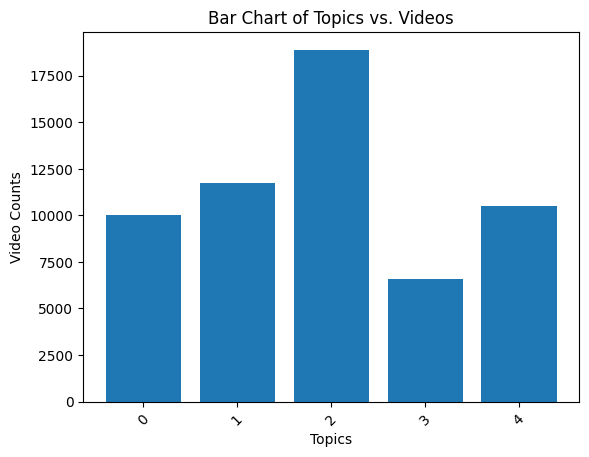

In [59]:
# Extract data from DataFrame columns
x_values = df_topic_distribution['Topic Num']
y_values = df_topic_distribution['Num Video Descriptions']

# Plot the bar chart
plt.bar(x_values, y_values)

# Add labels and title
plt.xlabel('Topics')
plt.ylabel('Video Counts')
plt.title('Bar Chart of Topics vs. Videos')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [66]:
# Assuming 'df' is your DataFrame
df_document_topic.reset_index(inplace=True)
df_document_topic.head(25)

,index,Topic 0:,Topic 1:,Topic 2:,Topic 3:,Topic 4:,dominant_topic
0,user1,0.009,0.399,0.261,0.009,0.322,1
1,user1,0.910,0.022,0.023,0.023,0.023,0
2,user1,0.882,0.030,0.029,0.029,0.030,0
3,user1,0.919,0.021,0.020,0.020,0.020,0
4,user1,0.337,0.561,0.034,0.034,0.034,1
5,user1,0.011,0.011,0.957,0.011,0.011,2
6,user1,0.920,0.020,0.020,0.020,0.020,0
7,user1,0.020,0.020,0.919,0.021,0.020,2
8,user1,0.020,0.020,0.918,0.021,0.020,2
9,user1,0.068,0.732,0.067,0.067,0.067,1


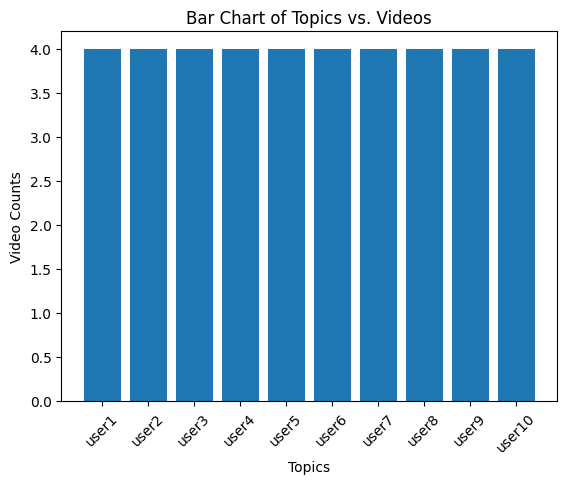

In [62]:
# Extract data from DataFrame columns
x_values = df_document_topic['index']
y_values = df_document_topic['dominant_topic']

# Plot the bar chart
plt.bar(x_values, y_values)

# Add labels and title
plt.xlabel('Topics')
plt.ylabel('Video Counts')
plt.title('Bar Chart of Topics vs. Videos')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [68]:
# Find the most frequent dominant_topic per user
most_frequent_topics = df_document_topic.groupby('index')['dominant_topic'].apply(lambda x: x.mode().iloc[0])

# Print the result
type(most_frequent_topics)

pandas.core.series.Series

In [69]:
# Find the most frequent dominant_topic per user
most_frequent_topics = df_document_topic.groupby('index')['dominant_topic'].apply(lambda x: x.value_counts().idxmax())

# Print the result
most_frequent_topics

index
user1     2
user10    2
user2     2
user3     2
user4     2
user5     2
user6     1
user7     2
user8     2
user9     2
Name: dominant_topic, dtype: int64

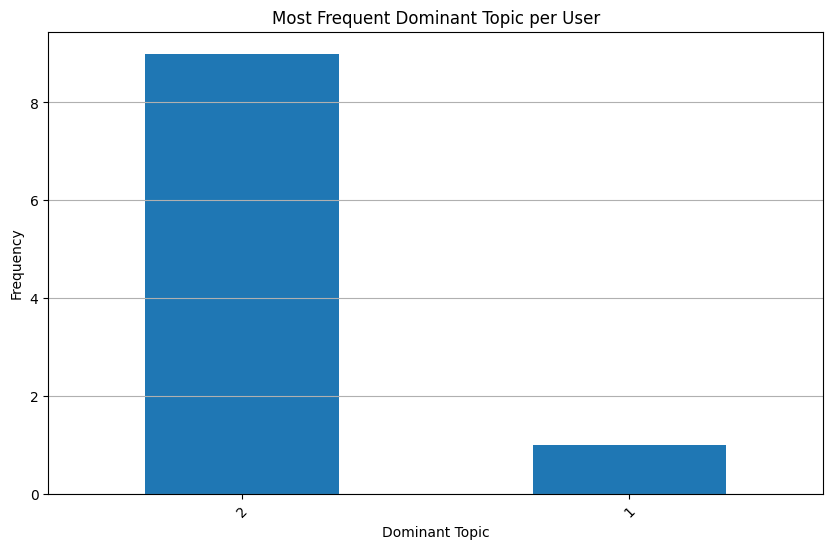

In [70]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
most_frequent_topics.value_counts().plot(kind='bar')
plt.title('Most Frequent Dominant Topic per User')
plt.xlabel('Dominant Topic')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()